# Comparative Need State Analysis for Ride-Hailing Platforms: A Case Study on PickMe and Uber

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the two datasets

# main_file_path: Contains all responses from both the English and Sinhala surveys, 
# excluding Sinhala entries where respondents selected "Both PickMe and Uber" and skipped the "b_time" question (due to its absence in that version of the survey).
main_file_path = 'The Main English dataset of final year project.xlsx'

# dual_platform_file_path: Contains the translated responses for Sinhala participants who selected "Both PickMe and Uber" 
# but originally missed the "b_time" question used for targeted missing value imputation.
dual_platform_file_path = 'Both PickMe & Uber Option translated data.xlsx'


In [3]:
# Create DataFrames from the Excel files
main_df = pd.read_excel(main_file_path)
dual_platform_df = pd.read_excel(dual_platform_file_path)

# DATA PREPROCESSING

#### main_df

In [4]:
# Get the row count of the dataset
row_count = len(main_df)
print(f"The dataset contains {row_count} rows.")

The dataset contains 428 rows.


In [5]:
main_df.dtypes

Timestamp               datetime64[ns]
Age                             object
Gender                          object
District                        object
Monthly_Income                  object
RideHailing_App                 object
P_PickMePreference              object
P_PickMePurpose                 object
P_PickMeFrequency               object
P_PickMeVehicle                 object
P_PickMeTime                    object
P_PickMePayment                 object
P_PickMePass                    object
U_UberPreference                object
U_UberPurpose                   object
U_UberFrequency                 object
U_UberVehicle                   object
U_UberTime                      object
U_UberPayment                   object
U_UberOne                       object
B_Preference                    object
B_SwitchingFrequency            object
B_Purpose                       object
B_Frequency                     object
B_Time                          object
B_PickMeVehicle          

In [6]:
# Remove duplicate rows, if any
main_df.drop_duplicates(inplace=True)

# Get the row count of the dataset
row_count = len(main_df)
print(f"The dataset contains {row_count} rows.")

The dataset contains 428 rows.


In [7]:
# Drop rows where all elements are missing
main_df.dropna(how='all', inplace=True)

# Get the row count of the dataset
row_count = len(main_df)
print(f"The dataset contains {row_count} rows.")

The dataset contains 428 rows.


In [8]:
# Count missing values for each column
missing_values = main_df.isnull().sum()

# Display the missing value count
print("Missing value count by column:")
print(missing_values)

Missing value count by column:
Timestamp                 0
Age                       0
Gender                    0
District                  0
Monthly_Income            0
RideHailing_App           0
P_PickMePreference      250
P_PickMePurpose         250
P_PickMeFrequency       250
P_PickMeVehicle         250
P_PickMeTime            250
P_PickMePayment         250
P_PickMePass            250
U_UberPreference        384
U_UberPurpose           384
U_UberFrequency         384
U_UberVehicle           384
U_UberTime              384
U_UberPayment           384
U_UberOne               384
B_Preference            227
B_SwitchingFrequency    227
B_Purpose               227
B_Frequency             227
B_Time                  227
B_PickMeVehicle         227
B_UberVehicle           227
B_PaymentMethod         227
B_PickMePass            227
B_UberOne               227
dtype: int64


In [9]:
# Remove the Timestamp column
main_df = main_df.drop(columns=['Timestamp'])

In [10]:
# Filter rows for Colombo district
colombo_df = main_df[main_df['District'] == 'Colombo']

# Get the row count of the dataset
row_count = len(colombo_df)
print(f"The dataset contains {row_count} rows.")

The dataset contains 355 rows.


In [11]:
# Convert all column names to lowercase
colombo_df.columns = colombo_df.columns.str.lower()

# Standardize column names (remove leading/trailing spaces and replace multiple spaces with a single space)
colombo_df.columns = colombo_df.columns.str.strip().str.replace(r'\s+', ' ', regex=True)

# Standardize string values in all object-type columns
colombo_df = colombo_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Convert all object-type column values to lowercase
colombo_df = colombo_df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

In [12]:
# Print the unique values in the RideHailing_App column
print("Unique values in the RideHailing_App column:")
for index, value in enumerate(colombo_df['ridehailing_app'].unique(), start=1):
    print(f"{index}. {value}")

Unique values in the RideHailing_App column:
1. pickme only
2. both pickme & uber
3. personal car
4. uber only
5. personal transport


In [13]:
# List of values to remove
values_to_remove = ['personal car', 'personal transport']

# Filter out rows where RideHailing_App contains unwanted values
colombo_df = colombo_df[~colombo_df['ridehailing_app'].isin(values_to_remove)]

# Verify the result
print("Unique values in the RideHailing_App column:")
for index, value in enumerate(colombo_df['ridehailing_app'].unique(), start=1):
    print(f"{index}. {value}")

Unique values in the RideHailing_App column:
1. pickme only
2. both pickme & uber
3. uber only


In [14]:
# Get the row count of the dataset
row_count = len(colombo_df)
print(f"The dataset contains {row_count} rows.")

The dataset contains 353 rows.


#### dual_platform_df

In [15]:
# Get the row count of the dataset
row_count = len(dual_platform_df)
print(f"The dataset contains {row_count} rows.")

The dataset contains 31 rows.


In [16]:
dual_platform_df.dtypes

Timestamp               datetime64[ns]
Age                             object
Gender                          object
District                        object
Monthly_Income                  object
RideHailing_App                 object
P_PickMePreference             float64
P_PickMePurpose                float64
P_PickMeFrequency              float64
P_PickMeVehicle                float64
P_PickMeTime                   float64
P_PickMePayment                float64
P_PickMePass                   float64
U_UberPreference               float64
U_UberPurpose                  float64
U_UberFrequency                float64
U_UberVehicle                  float64
U_UberTime                     float64
U_UberPayment                  float64
U_UberOne                      float64
B_Preference                    object
B_SwitchingFrequency            object
B_Purpose                       object
B_Frequency                     object
B_Time                         float64
B_PickMeVehicle          

In [17]:
# Remove duplicate rows, if any
dual_platform_df.drop_duplicates(inplace=True)

# Get the row count of the dataset
row_count = len(dual_platform_df)
print(f"The dataset contains {row_count} rows.")

The dataset contains 31 rows.


In [18]:
# Drop rows where all elements are missing
dual_platform_df.dropna(how='all', inplace=True)

# Get the row count of the dataset
row_count = len(dual_platform_df)
print(f"The dataset contains {row_count} rows.")

The dataset contains 31 rows.


In [19]:
# Count missing values for each column
missing_values = dual_platform_df.isnull().sum()

# Display the missing value count
print("Missing value count by column:")
print(missing_values)

Missing value count by column:
Timestamp                0
Age                      0
Gender                   0
District                 0
Monthly_Income           0
RideHailing_App          0
P_PickMePreference      31
P_PickMePurpose         31
P_PickMeFrequency       31
P_PickMeVehicle         31
P_PickMeTime            31
P_PickMePayment         31
P_PickMePass            31
U_UberPreference        31
U_UberPurpose           31
U_UberFrequency         31
U_UberVehicle           31
U_UberTime              31
U_UberPayment           31
U_UberOne               31
B_Preference             0
B_SwitchingFrequency     0
B_Purpose                0
B_Frequency              0
B_Time                  31
B_PickMeVehicle          0
B_UberVehicle            0
B_PaymentMethod          0
B_PickMePass             0
B_UberOne                0
dtype: int64


In [20]:
# Remove the Timestamp column
dual_platform_df = dual_platform_df.drop(columns=['Timestamp'])

In [21]:
# Filter rows for Colombo district
colombo_df2 = dual_platform_df[dual_platform_df['District'] == 'Colombo']

# Get the row count of the dataset
row_count = len(colombo_df2)
print(f"The dataset contains {row_count} rows.")

The dataset contains 31 rows.


In [22]:
# Convert all column names to lowercase
colombo_df2.columns = colombo_df2.columns.str.lower()

# Standardize column names (remove leading/trailing spaces and replace multiple spaces with a single space)
colombo_df2.columns = colombo_df2.columns.str.strip().str.replace(r'\s+', ' ', regex=True)

# Standardize string values in all object-type columns
colombo_df2 = colombo_df2.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Convert all object-type column values to lowercase
colombo_df2 = colombo_df2.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

In [23]:
# Print the unique values in the RideHailing_App column
print("Unique values in the RideHailing_App column:")
for index, value in enumerate(colombo_df2['ridehailing_app'].unique(), start=1):
    print(f"{index}. {value}")

Unique values in the RideHailing_App column:
1. both pickme & uber


### Imputation of missing values in b_time column in both_df

In [24]:
# Filter out rows where RideHailing_App is "both pickme & uber"
colombo_df_both = colombo_df[colombo_df["ridehailing_app"] == "both pickme & uber"]

# Get the row count of the dataset
row_count = len(colombo_df_both)
print(f"The dataset contains {row_count} rows.")

The dataset contains 165 rows.


In [25]:
# Select relevant categorical features for matching
matching_columns = ["b_purpose", "b_frequency"]

# Create a filtered dataset from colombo_df_both with non-null b_time for matching
filtered_both_df = colombo_df_both.dropna(subset=["b_time"]).copy()

In [26]:
# Define expected b_time values (including late night, adjust if invalid)
expected_times = [
    "morning (7 am - 10 am)",
    "evening (4 pm - 7 pm)",
    "office hours (7 am - 10 am & 4 pm - 7 pm)",
    "don't have a specific time",
    "late night (10 pm - 3 am)"
]

In [27]:
# Standardize multi-select b_time (sort to ensure consistency)
def standardize_b_time(b_time):
    if pd.isna(b_time):
        return b_time
    # Split, strip, sort, and rejoin
    times = [t.strip() for t in b_time.split(",") if t.strip() in expected_times]
    return ", ".join(sorted(set(times))) if times else "don't have a specific time"

# Apply standardization to filtered_both_df
filtered_both_df["b_time"] = filtered_both_df["b_time"].apply(standardize_b_time)

In [28]:
# Split b_purpose into lists
def split_purpose(purpose):
    if pd.isna(purpose):
        return []
    return [p.strip() for p in purpose.split(",")]

colombo_df2["b_purpose_list"] = colombo_df2["b_purpose"].apply(split_purpose)
filtered_both_df["b_purpose_list"] = filtered_both_df["b_purpose"].apply(split_purpose)

In [29]:
# Exact Matching
exact_matches = []
exact_filled = 0
for idx, row in colombo_df2[colombo_df2["b_time"].isna()].iterrows():
    matches = filtered_both_df[
        (filtered_both_df["b_frequency"] == row["b_frequency"]) &
        (filtered_both_df["b_purpose"] == row["b_purpose"])
    ].copy()
    if not matches.empty:
        b_time_mode = matches["b_time"].mode()
        if not b_time_mode.empty:
            selected_time = np.random.choice(b_time_mode) if len(b_time_mode) > 1 else b_time_mode[0]
            exact_matches.append((idx, selected_time))
            exact_filled += 1

print(f"Exact matching filled {exact_filled} rows.")

Exact matching filled 14 rows.


In [30]:
# Partial Matching
partial_matches = []
partial_filled = 0
for idx, row in colombo_df2[colombo_df2["b_time"].isna()].iterrows():
    if idx not in [x[0] for x in exact_matches]:
        matches = filtered_both_df[
            (filtered_both_df["b_frequency"] == row["b_frequency"]) &
            filtered_both_df["b_purpose_list"].apply(
                lambda x: sum(p in row["b_purpose_list"] for p in x) >= 2 if x and row["b_purpose_list"] else False
            )
        ].copy()
        if not matches.empty:
            b_time_mode = matches["b_time"].mode()
            if not b_time_mode.empty:
                selected_time = np.random.choice(b_time_mode) if len(b_time_mode) > 1 else b_time_mode[0]
                partial_matches.append((idx, selected_time))
                partial_filled += 1

print(f"Partial matching filled {partial_filled} rows.")

Partial matching filled 14 rows.


In [31]:
# Mode Fallback
mode_fallback = []
mode_filled = 0
overall_mode = filtered_both_df["b_time"].mode()[0] if not filtered_both_df["b_time"].mode().empty else "don't have a specific time"
for idx, row in colombo_df2[colombo_df2["b_time"].isna()].iterrows():
    if idx not in [x[0] for x in exact_matches + partial_matches]:
        mode_fallback.append((idx, overall_mode))
        mode_filled += 1

print(f"Mode fallback filled {mode_filled} rows.")

Mode fallback filled 3 rows.


In [32]:
# Apply Imputation
all_matches = exact_matches + partial_matches + mode_fallback
for idx, b_time in all_matches:
    colombo_df2.loc[idx, "b_time"] = b_time

In [33]:
# Drop temporary b_purpose_list
colombo_df2 = colombo_df2.drop(columns=["b_purpose_list"])
filtered_both_df = filtered_both_df.drop(columns=["b_purpose_list"])

In [34]:
# Verify missing
remaining_missing = colombo_df2["b_time"].isna().sum()
print(f"\nRemaining missing b_time values after imputation: {remaining_missing}")


Remaining missing b_time values after imputation: 0


In [35]:
# Validate b_time values
invalid_times = colombo_df2["b_time"].apply(
    lambda x: x if pd.notna(x) and not all(t.strip() in expected_times for t in x.split(",")) else None
).dropna().unique()
if len(invalid_times) > 0:
    print(f"Warning: Invalid b_time values found: {invalid_times}")

In [36]:
# b_time distribution in colombo_df2
print("\nUnique values in colombo_df2 b_time column with their counts:")
b_time_counts = colombo_df2["b_time"].value_counts()
for index, (value, count) in enumerate(b_time_counts.items(), start=1):
    print(f"{index}. {value} - {count} occurrences")


Unique values in colombo_df2 b_time column with their counts:
1. don't have a specific time - 25 occurrences
2. office hours (7 am - 10 am & 4 pm - 7 pm) - 2 occurrences
3. don't have a specific time, office hours (7 am - 10 am & 4 pm - 7 pm) - 1 occurrences
4. late night (10 pm - 3 am), office hours (7 am - 10 am & 4 pm - 7 pm) - 1 occurrences
5. evening (4 pm - 7 pm), late night (10 pm - 3 am), morning (7 am - 10 am) - 1 occurrences
6. evening (4 pm - 7 pm), morning (7 am - 10 am), office hours (7 am - 10 am & 4 pm - 7 pm) - 1 occurrences


In [37]:
# filtered_both_df distribution
print("\nfiltered_both_df b_time distribution for reference:")
filtered_b_time_counts = filtered_both_df["b_time"].value_counts()
for index, (value, count) in enumerate(filtered_b_time_counts.items(), start=1):
    print(f"{index}. {value} - {count} occurrences")


filtered_both_df b_time distribution for reference:
1. don't have a specific time - 61 occurrences
2. office hours (7 am - 10 am & 4 pm - 7 pm) - 24 occurrences
3. evening (4 pm - 7 pm) - 13 occurrences
4. late night (10 pm - 3 am), office hours (7 am - 10 am & 4 pm - 7 pm) - 9 occurrences
5. evening (4 pm - 7 pm), office hours (7 am - 10 am & 4 pm - 7 pm) - 8 occurrences
6. evening (4 pm - 7 pm), late night (10 pm - 3 am), morning (7 am - 10 am) - 6 occurrences
7. late night (10 pm - 3 am) - 6 occurrences
8. morning (7 am - 10 am) - 5 occurrences
9. evening (4 pm - 7 pm), late night (10 pm - 3 am) - 5 occurrences
10. evening (4 pm - 7 pm), late night (10 pm - 3 am), office hours (7 am - 10 am & 4 pm - 7 pm) - 5 occurrences
11. evening (4 pm - 7 pm), morning (7 am - 10 am) - 5 occurrences
12. evening (4 pm - 7 pm), morning (7 am - 10 am), office hours (7 am - 10 am & 4 pm - 7 pm) - 4 occurrences
13. don't have a specific time, office hours (7 am - 10 am & 4 pm - 7 pm) - 4 occurrences


In [38]:
# Convert float64 columns in colombo_df2 to object
float_cols = colombo_df2.select_dtypes(include=['float64']).columns
print(f"float64 columns in colombo_df2: {float_cols}")

float64 columns in colombo_df2: Index(['p_pickmepreference', 'p_pickmepurpose', 'p_pickmefrequency',
       'p_pickmevehicle', 'p_pickmetime', 'p_pickmepayment', 'p_pickmepass',
       'u_uberpreference', 'u_uberpurpose', 'u_uberfrequency', 'u_ubervehicle',
       'u_ubertime', 'u_uberpayment', 'u_uberone'],
      dtype='object')


In [39]:
for col in float_cols:
    if col in colombo_df.columns and colombo_df[col].dtype == 'object':
        print(f"Converting {col} from float64 to object to match colombo_df.")
        colombo_df2[col] = colombo_df2[col].astype('object')
    else:
        print(f"Warning: Column {col} is float64 but not in colombo_df or not object. Investigate further.")

Converting p_pickmepreference from float64 to object to match colombo_df.
Converting p_pickmepurpose from float64 to object to match colombo_df.
Converting p_pickmefrequency from float64 to object to match colombo_df.
Converting p_pickmevehicle from float64 to object to match colombo_df.
Converting p_pickmetime from float64 to object to match colombo_df.
Converting p_pickmepayment from float64 to object to match colombo_df.
Converting p_pickmepass from float64 to object to match colombo_df.
Converting u_uberpreference from float64 to object to match colombo_df.
Converting u_uberpurpose from float64 to object to match colombo_df.
Converting u_uberfrequency from float64 to object to match colombo_df.
Converting u_ubervehicle from float64 to object to match colombo_df.
Converting u_ubertime from float64 to object to match colombo_df.
Converting u_uberpayment from float64 to object to match colombo_df.
Converting u_uberone from float64 to object to match colombo_df.


In [40]:
colombo_df2.dtypes

age                     object
gender                  object
district                object
monthly_income          object
ridehailing_app         object
p_pickmepreference      object
p_pickmepurpose         object
p_pickmefrequency       object
p_pickmevehicle         object
p_pickmetime            object
p_pickmepayment         object
p_pickmepass            object
u_uberpreference        object
u_uberpurpose           object
u_uberfrequency         object
u_ubervehicle           object
u_ubertime              object
u_uberpayment           object
u_uberone               object
b_preference            object
b_switchingfrequency    object
b_purpose               object
b_frequency             object
b_time                  object
b_pickmevehicle         object
b_ubervehicle           object
b_paymentmethod         object
b_pickmepass            object
b_uberone               object
dtype: object

In [41]:
if set(colombo_df2.columns) != set(colombo_df.columns):
    print("Warning: Column mismatch between colombo_df2 and colombo_df:")
    print(f"colombo_df2: {set(colombo_df2.columns) - set(colombo_df.columns)}")
    print(f"colombo_df: {set(colombo_df.columns) - set(colombo_df2.columns)}")

In [42]:
# Append colombo_df2_new to colombo_df
colombo_df_combined = pd.concat([colombo_df2, colombo_df], ignore_index=True)

# Reset index to maintain a clean structure
colombo_df_combined.reset_index(drop=True, inplace=True)

# Verify dtypes and row count
print("colombo_df_combined dtypes:\n", colombo_df_combined.dtypes)
row_count = len(colombo_df_combined)
print(f"The dataset contains {row_count} rows.")

colombo_df_combined dtypes:
 age                     object
gender                  object
district                object
monthly_income          object
ridehailing_app         object
p_pickmepreference      object
p_pickmepurpose         object
p_pickmefrequency       object
p_pickmevehicle         object
p_pickmetime            object
p_pickmepayment         object
p_pickmepass            object
u_uberpreference        object
u_uberpurpose           object
u_uberfrequency         object
u_ubervehicle           object
u_ubertime              object
u_uberpayment           object
u_uberone               object
b_preference            object
b_switchingfrequency    object
b_purpose               object
b_frequency             object
b_time                  object
b_pickmevehicle         object
b_ubervehicle           object
b_paymentmethod         object
b_pickmepass            object
b_uberone               object
dtype: object
The dataset contains 384 rows.


### Final preprocessing

In [43]:
# Apply transformation: If "don't have a specific time" appears with other values, replace it with just "don't have a specific time"
colombo_df_combined["b_time"] = colombo_df_combined["b_time"].apply(
    lambda x: "don't have a specific time" if "don't have a specific time" in str(x) else x
)

In [44]:
# Remove extra spaces and unnecessary commas just in case
colombo_df_combined = colombo_df_combined.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
colombo_df_combined = colombo_df_combined.apply(lambda x: x.str.replace(r'\s+', ' ', regex=True) if x.dtype == "object" else x)
colombo_df_combined = colombo_df_combined.apply(lambda x: x.str.replace(',+', ',', regex=True) if x.dtype == "object" else x)

# Rename the dataframe
preprocessed_data = colombo_df_combined.copy()

# EXPLORATORY DATA ANALYSIS

In [45]:
preprocessed_data.shape

(384, 29)

### Column Descriptions (preprocessed_data)

- **age**: Age group of the respondent (e.g., 18-25)
- **gender**: Gender of the respondent (male/female)
- **district**: Respondent’s district (Colombo only)
- **monthly_income**: Reported monthly income bracket
- **ridehailing_app**: App(s) used (PickMe, Uber, or both)
- **p_pickmepreference**: Reason for preferring PickMe
- **p_pickmepurpose**: Purpose for using PickMe
- **p_pickmefrequency**: How often PickMe is used
- **p_pickmevehicle**: Preferred vehicle on PickMe
- **p_pickmetime**: Preferred time for using PickMe
- **p_pickmepayment**: Payment method used for PickMe
- **p_pickmepass**: Uses PickMe Pass? (yes/no)
- **u_uberpreference**: Reason for preferring Uber
- **u_uberpurpose**: Purpose for using Uber
- **u_uberfrequency**: How often Uber is used
- **u_ubervehicle**: Preferred vehicle on Uber
- **u_ubertime**: Preferred time for using Uber
- **u_uberpayment**: Payment method used for Uber
- **u_uberone**: Uses Uber One? (yes/no)
- **b_preference**: Reason for using both apps
- **b_switchingfrequency**: How often they switch between apps
- **b_purpose**: Main purpose for using ride-hailing
- **b_frequency**: Ride-hailing usage frequency
- **b_time**: Preferred time of travel
- **b_pickmevehicle**: Preferred vehicle in PickMe
- **b_ubervehicle**: Preferred vehicle in Uber
- **b_paymentmethod**: Payment method used (cash/card/both)
- **b_pickmepass**: Uses PickMe Pass? (yes/no)
- **b_uberone**: Uses Uber One? (yes/no)

In [46]:
# Set the style for better visuals
sns.set_style("whitegrid")

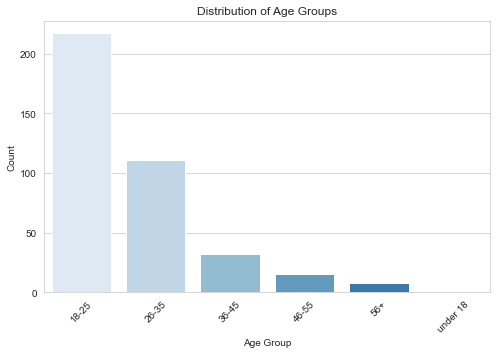

In [47]:
# Age Groups Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=preprocessed_data, x="age", order=preprocessed_data["age"].value_counts().index, palette="Blues")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Age Groups")
plt.xticks(rotation=45)
plt.savefig("age_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

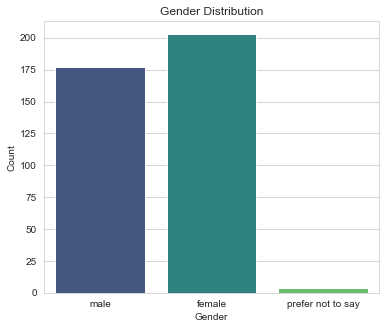

In [48]:
# Gender Distribution
plt.figure(figsize=(6, 5))
sns.countplot(data=preprocessed_data, x="gender", palette="viridis")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.savefig("gender_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

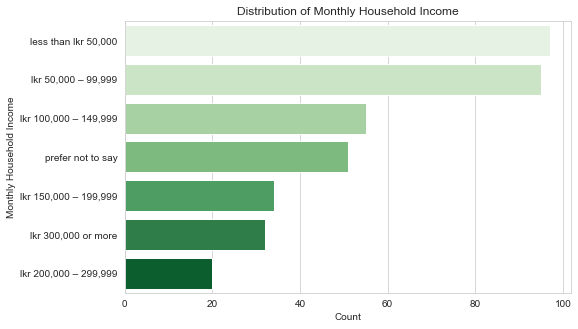

In [49]:
# Monthly Household Income Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=preprocessed_data, y="monthly_income", order=preprocessed_data["monthly_income"].value_counts().index, palette="Greens")
plt.ylabel("Monthly Household Income")
plt.xlabel("Count")
plt.title("Distribution of Monthly Household Income")
plt.savefig("householdincome_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

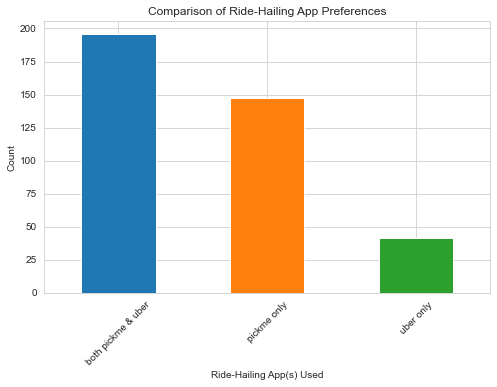

In [50]:
# Ride-Hailing App Preferences Breakdown
ride_hailing_counts = preprocessed_data["ridehailing_app"].value_counts()

plt.figure(figsize=(8, 5))
ride_hailing_counts.plot(kind="bar", color=["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.xlabel("Ride-Hailing App(s) Used")
plt.ylabel("Count")
plt.title("Comparison of Ride-Hailing App Preferences")
plt.xticks(rotation=45)
plt.savefig("platform_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

# k-mode Clustering 

In [51]:
# Import the nessasary libraries for clustering
!pip install kmodes

In [52]:
from kmodes.kmodes import KModes

In [53]:
# Replace nulls with "Not Applicable" due to conditional survey design
df_for_clustering = preprocessed_data.fillna("Not Applicable")
print(df_for_clustering.isnull().sum())  # Should show 0 for all columns

age                     0
gender                  0
district                0
monthly_income          0
ridehailing_app         0
p_pickmepreference      0
p_pickmepurpose         0
p_pickmefrequency       0
p_pickmevehicle         0
p_pickmetime            0
p_pickmepayment         0
p_pickmepass            0
u_uberpreference        0
u_uberpurpose           0
u_uberfrequency         0
u_ubervehicle           0
u_ubertime              0
u_uberpayment           0
u_uberone               0
b_preference            0
b_switchingfrequency    0
b_purpose               0
b_frequency             0
b_time                  0
b_pickmevehicle         0
b_ubervehicle           0
b_paymentmethod         0
b_pickmepass            0
b_uberone               0
dtype: int64


In [54]:
# Make sure all columns are treated as categorical (convert to string)
df_for_clustering = df_for_clustering.astype(str)

In [55]:
# Determine the optimal number of clusters using the cost function
costs = []
K_range = range(2, 10)  # Testing clusters from 2 to 10

for K in K_range:
    km = KModes(n_clusters=K, init='Huang', n_init=5, verbose=0)
    km.fit(df_for_clustering)
    costs.append(km.cost_)

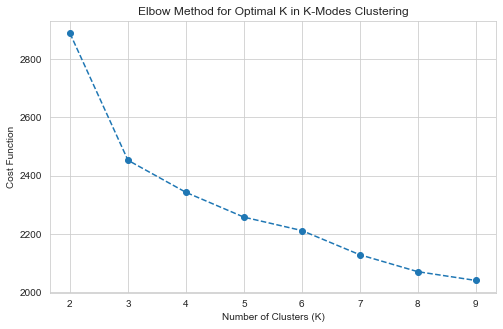

In [56]:
# Plot the Elbow Method (cost function plot)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(K_range, costs, marker="o", linestyle="dashed")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Cost Function")
plt.title("Elbow Method for Optimal K in K-Modes Clustering")
plt.savefig("elbowmethod.png", dpi=300, bbox_inches='tight')
plt.show()

In [57]:
def categorical_silhouette_score(X, labels):
    unique_labels = np.unique(labels)
    silhouette_scores = []
    for i, label in enumerate(labels):
        same_cluster = X[labels == label]
        other_clusters = X[labels != label]
        if len(same_cluster) > 1:
            a = np.mean([np.sum(same_cluster != row) for row in same_cluster])
            b = np.min([np.mean(np.sum(other_clusters != row, axis=1)) for row in same_cluster])
            silhouette_scores.append((b - a) / max(a, b))
    return np.mean(silhouette_scores) if silhouette_scores else -1

In [58]:
def dunn_index(X, labels):
    unique_labels = np.unique(labels)
    intra_distances = []
    inter_distances = []
    for label in unique_labels:
        cluster_points = X[labels == label]
        if len(cluster_points) > 1:
            intra_distances.append(np.mean([np.sum(cluster_points != row) for row in cluster_points]))
    for i, label_i in enumerate(unique_labels):
        cluster_i = X[labels == label_i]
        for j, label_j in enumerate(unique_labels):
            if i != j:
                cluster_j = X[labels == label_j]
                inter_distances.append(np.mean([np.sum(cluster_i != row) for row in cluster_j]))
    return min(inter_distances) / max(intra_distances) if intra_distances and inter_distances else -1

In [59]:
# Convert categorical values to numeric codes (only for evaluation)
X_numeric = df_for_clustering.apply(lambda col: col.astype("category").cat.codes).to_numpy()

# Initialize evaluation metric containers
silhouette_scores = []
dunn_indices = []

# Evaluate clustering performance for different values of K
for K in K_range:
    km = KModes(n_clusters=K, init='Huang', n_init=5, verbose=0)
    labels = km.fit_predict(df_for_clustering)

    # Append evaluation metrics
    silhouette_scores.append(categorical_silhouette_score(X_numeric, labels))
    dunn_indices.append(dunn_index(X_numeric, labels))

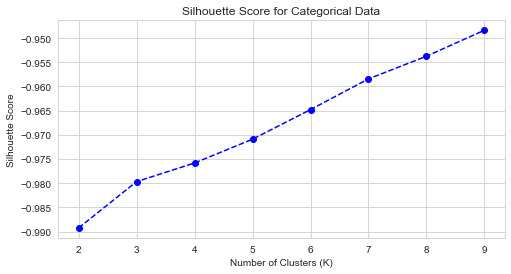

In [60]:
# Plot evaluation metrics
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, marker="o", linestyle="dashed", color="blue")
plt.title("Silhouette Score for Categorical Data")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.savefig("silhouette_score.png", dpi=300, bbox_inches='tight')
plt.show()


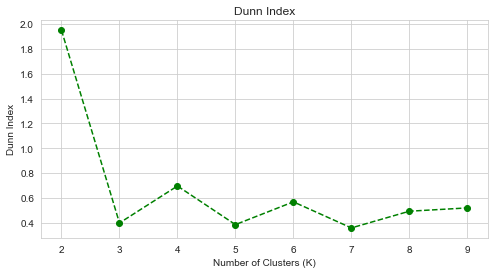

In [61]:
plt.figure(figsize=(8, 4))
plt.plot(K_range, dunn_indices, marker="o", linestyle="dashed", color="green")
plt.title("Dunn Index")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Dunn Index")
plt.savefig("dunnindex.png", dpi=300, bbox_inches='tight')
plt.show()

In [62]:
# Optimal clusters (k=4) selected using elbow method, Dunn index, and categorical silhouette score.
# Apply K-Modes clustering to df_for_clustering
k = 4
kmodes_model = KModes(n_clusters=k, init="Cao", n_init=15, verbose=1)
cluster_labels = kmodes_model.fit_predict(df_for_clustering)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 23, cost: 2330.0
Run 1, iteration: 2/100, moves: 15, cost: 2319.0
Run 1, iteration: 3/100, moves: 10, cost: 2319.0


In [63]:
# Add cluster labels to the original dataset
preprocessed_data["Cluster"] = cluster_labels

# View cluster distribution with counts and percentages
cluster_counts = preprocessed_data["Cluster"].value_counts()
total_rows = len(preprocessed_data)
print("\nCluster Distribution:")
for cluster, count in cluster_counts.items():
    percentage = (count / total_rows) * 100
    print(f"Cluster {cluster}: {count} (~{percentage:.1f}%)")


Cluster Distribution:
Cluster 1: 147 (~38.3%)
Cluster 0: 136 (~35.4%)
Cluster 3: 60 (~15.6%)
Cluster 2: 41 (~10.7%)


In [64]:
# Generate cluster summaries

cluster_summary = preprocessed_data.groupby("Cluster")["ridehailing_app"].value_counts(normalize=True).unstack().fillna(0) * 100

# Display as percentage distribution in each cluster
print(cluster_summary.round(2))

ridehailing_app  both pickme & uber  pickme only  uber only
Cluster                                                    
0                             100.0          0.0        0.0
1                               0.0        100.0        0.0
2                               0.0          0.0      100.0
3                             100.0          0.0        0.0


In [65]:
visual_columns = ['age', 'gender', 'monthly_income', 'ridehailing_app']

excluded_columns = ["customerid", "Cluster"]
profile_columns = [
    col for col in preprocessed_data.columns
    if preprocessed_data[col].dtype == 'object' and col not in excluded_columns
]

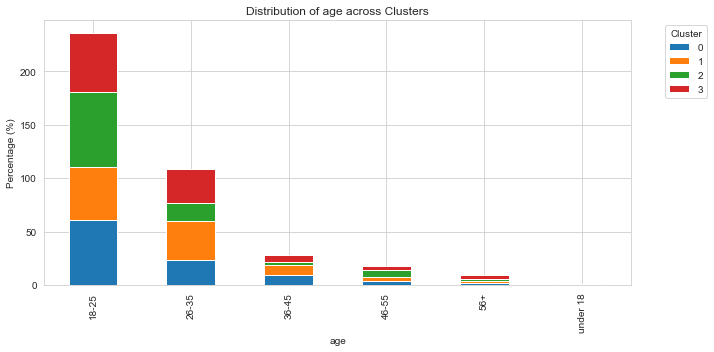

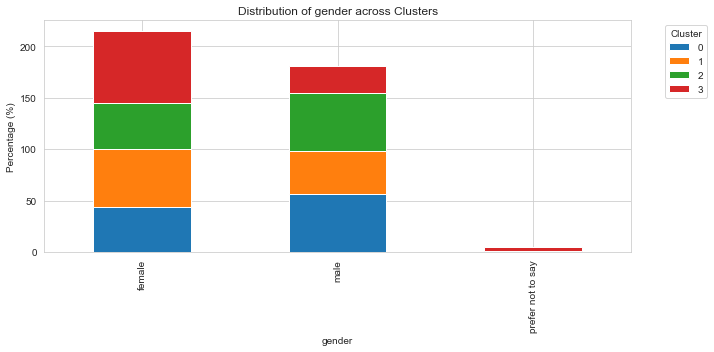

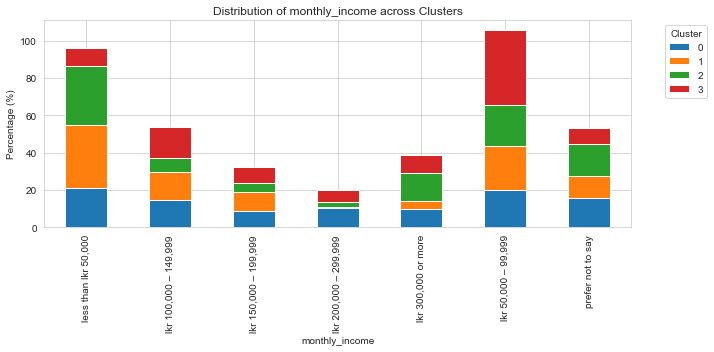

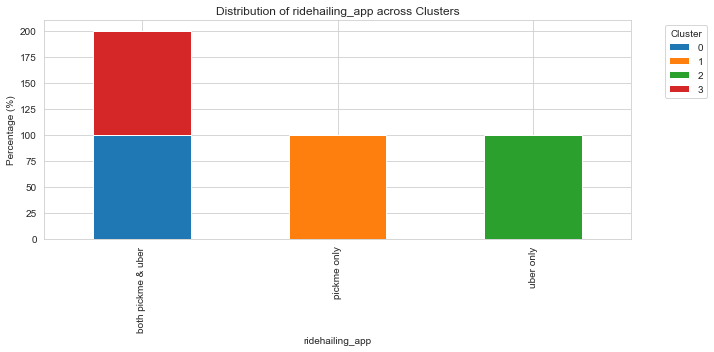

In [66]:
cluster_profiles = {}

# Visualize only selected columns
for col in visual_columns:
    summary = preprocessed_data.groupby("Cluster")[col].value_counts(normalize=True).unstack().fillna(0) * 100
    cluster_profiles[col] = summary

    summary.T.plot(kind="bar", stacked=True,figsize=(10, 5))
    plt.title(f"Distribution of {col} across Clusters")
    plt.ylabel("Percentage (%)")
    plt.xlabel(col)
    plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [67]:
text_profiles = []

for cluster in sorted(preprocessed_data["Cluster"].unique()):
    desc = f"🔹 **Cluster {cluster}**:\n"
    for col in profile_columns:
        cluster_data = preprocessed_data[preprocessed_data["Cluster"] == cluster][col].dropna()
        
        if not cluster_data.empty:
            try:
                mode_value = cluster_data.mode()[0]
                mode_pct = cluster_data.value_counts(normalize=True).loc[mode_value] * 100
                desc += f"   - Most users are '{mode_value}' for **{col}** ({mode_pct:.1f}%)\n"
            except:
                pass  # Silently skip if something goes wrong
    print(desc)
    print("-" * 60)


🔹 **Cluster 0**:
   - Most users are '18-25' for **age** (61.0%)
   - Most users are 'male' for **gender** (56.6%)
   - Most users are 'colombo' for **district** (100.0%)
   - Most users are 'less than lkr 50,000' for **monthly_income** (21.3%)
   - Most users are 'both pickme & uber' for **ridehailing_app** (100.0%)
   - Most users are 'to compare prices' for **b_preference** (22.1%)
   - Most users are 'often' for **b_switchingfrequency** (54.4%)
   - Most users are 'comfort and convenience' for **b_purpose** (19.1%)
   - Most users are 'weekly' for **b_frequency** (48.5%)
   - Most users are 'don't have a specific time' for **b_time** (48.5%)
   - Most users are 'tuk' for **b_pickmevehicle** (36.8%)
   - Most users are 'tuk' for **b_ubervehicle** (61.0%)
   - Most users are 'cash' for **b_paymentmethod** (60.3%)
   - Most users are 'no' for **b_pickmepass** (83.8%)
   - Most users are 'no' for **b_uberone** (79.4%)

------------------------------------------------------------
🔹 **Cl

In [70]:
# Define a mapping from cluster number to descriptive label
cluster_label_map = {
    0: "Flexible Weekly Dual-App Users",
    1: "PickMe-Focused, Low-Frequency Cash Users",
    2: "Occasional Price Sensitive Uber Users",
    3: "Loyal Female Dominant Daily Riders with Subscriptions"
}

# Create the new column using the mapping
preprocessed_data["cluster_label"] = preprocessed_data["Cluster"].map(cluster_label_map)

In [71]:
preprocessed_data.to_csv("clustered_data.csv", index=False)
print("Clustered data saved to 'clustered_data.csv'")

Clustered data saved to 'clustered_data.csv'
